In [37]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [38]:
data = pd.read_csv("co2.csv")

In [39]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [41]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [42]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


[]

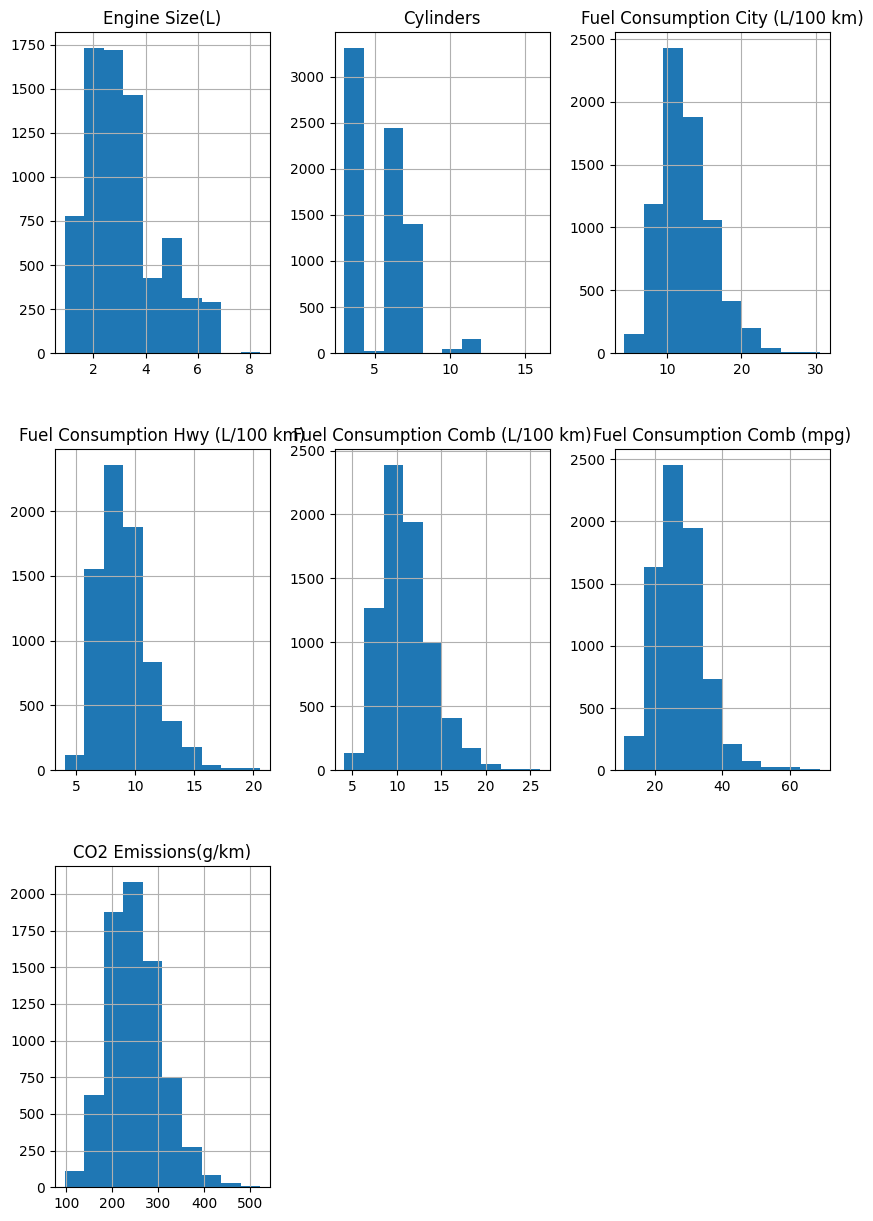

In [43]:
data.hist(figsize=(10,15))
plt.plot()

In [44]:
le=LabelEncoder()

In [45]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [46]:
data['Make'] = le.fit_transform(data['Make'])
data['Model'] = le.fit_transform(data['Model'])
data['Vehicle Class'] = le.fit_transform(data['Vehicle Class'])
data['Fuel Type'] = le.fit_transform(data['Fuel Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])

In [47]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [48]:
sc= StandardScaler()

In [49]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [50]:
columnsToScale = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

In [51]:
data_scaled = sc.fit_transform( data[columnsToScale])

In [52]:
data_sc_df = pd.DataFrame( data_scaled  , columns = columnsToScale)

In [53]:
data_sc_df.corr()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,0.012679,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Model,0.012679,1.000000,0.190713,0.070426,0.048399,-0.016260,-0.079554,0.101590,0.161755,0.123675,-0.098375,0.105847
Vehicle Class,-0.029558,0.190713,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.070426,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.048399,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.016260,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.079554,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.101590,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.161755,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.123675,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052


<Axes: >

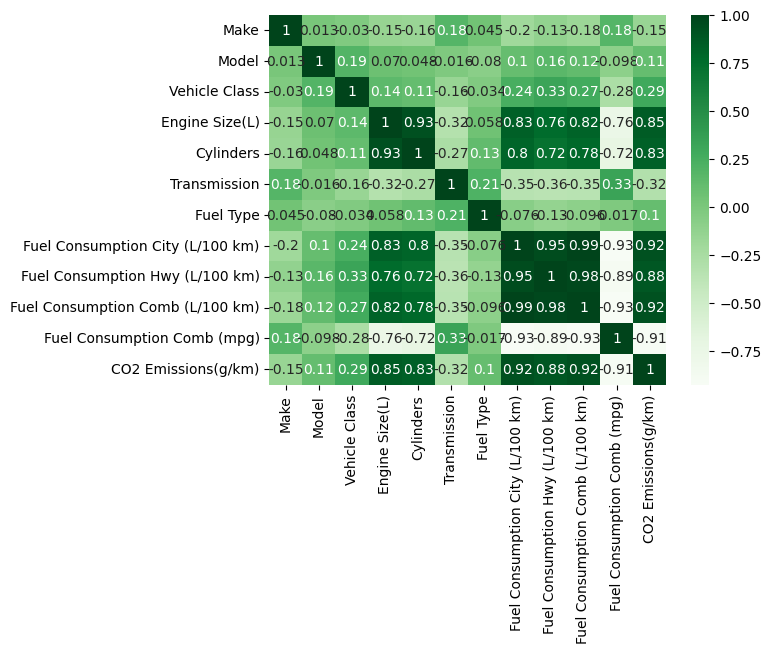

In [54]:
import seaborn as sns 
sns.heatmap(data_sc_df.corr(), annot=True, cmap="Greens")

In [71]:
x = data_sc_df.drop("CO2 Emissions(g/km)" , axis = 1 )
y = data['CO2 Emissions(g/km)']

In [72]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 42)

In [73]:
from sklearn.linear_model import LinearRegression , LogisticRegression

In [74]:
model = LinearRegression()
model1 = LogisticRegression()

In [75]:
model.fit(x_train , y_train)

LinearRegression()

In [76]:
model1.fit(x_train , y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(x_test)

In [78]:
y_pred1 = model1.predict(x_test)

In [79]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [80]:
r2 = r2_score(y_pred , y_test)
r21 = r2_score(y_pred1 , y_test)
print("R2 Score for Linear Rgression:" , r2)
print("R2 Score for Logistic Rgression :" , r21)

R2 Score for Linear Rgression: 0.9055973052781032
R2 Score for Logistic Rgression : 0.889710904600045


In [81]:
mae = mean_absolute_error(y_pred , y_test)
mae1 = mean_absolute_error(y_pred1, y_test)
print("Mean abs error for linear Rgression:" , mae)
print("Mean abs error for Logistic regression :" , mae1)

Mean abs error for linear Rgression: 11.05816543944833
Mean abs error for Logistic regression : 12.91832129963899


In [82]:
mse = mean_squared_error(y_pred , y_test)
mse1 = mean_squared_error(y_pred1 , y_test)
print("Mean Squared Error for Linear Regression:" , mse)
print("Mean Squared Error for Logistic Rgression :" , mse1)

Mean Squared Error for Linear Regression: 293.39011084156317
Mean Squared Error for Logistic Rgression : 322.7468411552347


In [83]:
import pickle as pkl 
with open("model.pkl" , "wb") as file :
    pkl.dump(model , file)